<a href="https://colab.research.google.com/github/alekhyakm/NYC_taxi_trip_time_prediction/blob/main/NYC_taxi_trip_time_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **NYC taxi trip time prediction**




##### **Project Type**    - Regression supervised
##### **Contribution** - Team
##### **Team Member 1 -** Alekhya K M
##### **Team Member 2 -** Bhavan Singh Baman


# **Project Summary -**

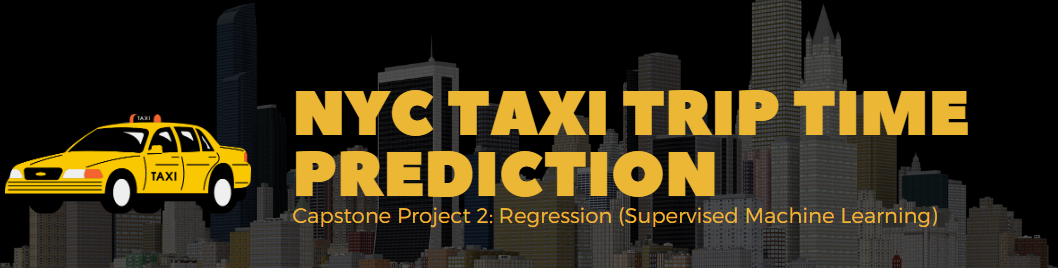

The NYC taxi trip time prediction project involves building a machine learning model to predict the time it takes for a taxi to travel from one location to another in New York City. The model takes into account various factors such as traffic conditions, weather, time of day, and origin-destination pairs to make its predictions.

To build the model, a large dataset of historical taxi trip records is used to train the model. This dataset includes information such as pickup and drop-off locations, time of day, and trip duration. Various machine learning algorithms, such as regression and decision trees, can be applied to the data to build a predictive model.

Once the model is trained, it can be used to predict the trip time for new, unseen taxi trips in NYC. This information can be useful for taxi drivers and passengers, as well as for transportation planning and optimization.

The results of the project can also be used to understand the factors that influence taxi trip times in NYC, such as traffic patterns, weather conditions, and time of day. This information can be used to make improvements to the city's transportation infrastructure and to develop more efficient transportation systems.

 **GitHub Link -**

https://github.com/alekhyakm/NYC_taxi_trip_time_prediction.git



# **Problem Statement**


## **BUSINESS PROBLEM OVERVIEW**`

The problem statement for the NYC taxi trip time prediction project is to accurately predict the time it takes for a taxi to travel from one location to another in New York City. The objective is to develop a machine learning model that takes into account various factors such as  time of day, and origin-destination pairs to make its predictions.

The challenge lies in capturing the complex relationships between the various factors that influence taxi trip times and accurately predicting the trip duration for any given trip. 

The solution to this problem will have practical applications for taxi drivers and passengers, as well as for transportation planning and optimization. Accurate taxi trip time predictions can help drivers plan their routes more effectively and reduce the time and cost of travel for passengers. It can also be used to improve the city's transportation infrastructure and to develop more efficient transportation systems.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import Libraries

# Visualizations libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import folium
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import FastMarkerCluster


import math
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


import warnings
warnings.filterwarnings('ignore')

import seaborn as sns     
sns.set()


### Dataset Loading

You can access the data from [here](https://drive.google.com/drive/folders/1ijU7G6GoVeKveT8D7mp_4q-nOeB9C0GB)

In [ ]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Datasets/NYC Taxi Data.csv')



### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(1458644, 11)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

The given dataset has no missing or null values
we considered as a clean dataset

### What did you know about your dataset?

In our dataset of NYC taxi trip time prediction, there are **1458644 rows** and 



**11 columns** with **zero null values** and **zero duplicate value**




## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


### Variables Description 

|Fields     |Description   |
|-----------|--------------|
|**id**| A unique identifier for each trip|
|**vendor_id**|A code indicating the provider associated with the trip rec|
|**pickup datetime**|date and time when the meter was engaged|
|**dropoff datetime**|date and time when the meter was disengaged|
|**passenger_count**|the number of passengers in the vehicle (driver entered value)|
|**pickup latitude**|the latitude where the meter was engaged|
|**dropoff longitude**|the longitude where the meter was disengaged|
|**dropoff latitude**|the latitude where the meter was disengaged|
|**store and fwd flag**|This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server: Y - store and forward, N - not a store and forward trip|
|**trip duration**|duration of the trip in seconds|

**Continous numerical:** id, pickuplongitude, pickuplatitude, dropofflongitude, dropofflatitude, trip_duration

**Discrete numerical:** vendorid, passenger_count, pickup_datetime_hour, dropoff_datetime_hour

**Datetime:** pickupdatetime, dropoffdatetime

**Nominal categorical:** store_and_fwd_flag, pickup_datetime_day, pickup_datetime_month, dropoff_datetime_day, dropoff_datetime_month

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Here we convert the dataype from object to datetime
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])


# Map 'Y' to 1 and 'N' to 0
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].map({'Y': 1, 'N': 0})

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  int64         
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(4), object(1)
memory usage: 122.4+ MB


In [ ]:
#Calculate and assign new columns to the dataframe such as weekday,
#month and pickup_hour which will help us to gain more insights from the data.

df['month'] = df.pickup_datetime.dt.month
df['weekday_num'] = df.pickup_datetime.dt.weekday
df['pickup_hour'] = df.pickup_datetime.dt.hour

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,month,weekday_num,pickup_hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,3,0,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,6,6,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,1,1,11
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,4,2,19
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,3,5,13


In [ ]:
df['vendor_id'].value_counts()

2    780302
1    678342
Name: vendor_id, dtype: int64

In [ ]:
df['passenger_count'].value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

In [ ]:
df['store_and_fwd_flag'].value_counts()

0    1450599
1       8045
Name: store_and_fwd_flag, dtype: int64

In [ ]:
df.trip_duration.value_counts()

368      1624
408      1584
348      1582
367      1581
358      1577
         ... 
7378        1
83250       1
6615        1
34014       1
6124        1
Name: trip_duration, Length: 7417, dtype: int64

In [ ]:
#Top 10 Longest trip
top10longest = df.sort_values(by=['trip_duration'],ascending=False)[:10]
top10longest

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,month,weekday_num,pickup_hour
978383,id0053347,1,2016-02-13 22:46:52,2016-03-25 18:18:14,1,-73.783905,40.648632,-73.978271,40.750202,0,3526282,2,5,22
924150,id1325766,1,2016-01-05 06:14:15,2016-01-31 01:01:07,1,-73.983788,40.742325,-73.985489,40.727676,0,2227612,1,1,6
680594,id0369307,1,2016-02-13 22:38:00,2016-03-08 15:57:38,2,-73.921677,40.735252,-73.984749,40.759979,0,2049578,2,5,22
355003,id1864733,1,2016-01-05 00:19:42,2016-01-27 11:08:38,1,-73.789650,40.643559,-73.956810,40.773087,0,1939736,1,1,0
1234291,id1942836,2,2016-02-15 23:18:06,2016-02-16 23:17:58,2,-73.794525,40.644825,-73.991051,40.755573,0,86392,2,0,23
295382,id0593332,2,2016-05-31 13:00:39,2016-06-01 13:00:30,1,-73.781952,40.644688,-73.993874,40.745926,0,86391,5,1,13
73816,id0953667,2,2016-05-06 00:00:10,2016-05-07 00:00:00,1,-73.996010,40.753220,-73.979027,40.740601,0,86390,5,4,0
59891,id2837671,2,2016-06-30 16:37:52,2016-07-01 16:37:39,1,-73.992279,40.749729,-73.962524,40.800770,0,86387,6,3,16
1360439,id1358458,2,2016-06-23 16:01:45,2016-06-24 16:01:30,1,-73.782089,40.644806,-73.985016,40.666828,0,86385,6,3,16
753765,id2589925,2,2016-05-17 22:22:56,2016-05-18 22:22:35,4,-74.006111,40.734680,-73.958809,40.815449,0,86379,5,1,22


In [ ]:
#Top 10 shortest trip
top10shortest = df.sort_values(by=['trip_duration'])[:10]
top10shortest

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,month,weekday_num,pickup_hour
207497,id1520236,1,2016-05-17 09:03:38,2016-05-17 09:03:39,1,-73.819893,40.740822,-73.819885,40.740822,0,1,5,1,9
1382872,id0839864,1,2016-02-06 13:40:27,2016-02-06 13:40:28,1,-73.987991,40.724083,-73.987991,40.724079,0,1,2,5,13
1360664,id0480433,1,2016-01-14 12:33:28,2016-01-14 12:33:29,1,-73.991486,40.741940,-73.991478,40.741955,0,1,1,3,12
346102,id2375785,1,2016-01-15 23:57:18,2016-01-15 23:57:19,1,-73.985825,40.755760,-73.985901,40.755829,0,1,1,4,23
1034341,id0218424,1,2016-01-17 13:50:16,2016-01-17 13:50:17,1,-73.953728,40.670036,-73.953346,40.670021,0,1,1,6,13
1439166,id2943073,2,2016-01-03 16:55:44,2016-01-03 16:55:45,1,-73.975677,40.785488,-73.976372,40.785831,0,1,1,6,16
35196,id2536510,1,2016-04-17 11:44:49,2016-04-17 11:44:50,1,-73.940384,40.786423,-73.940300,40.786373,0,1,4,6,11
918415,id0900936,2,2016-02-24 22:14:20,2016-02-24 22:14:21,1,-74.004005,40.745125,-74.003998,40.745144,0,1,2,2,22
767271,id0229521,1,2016-06-25 23:45:12,2016-06-25 23:45:13,1,-73.982925,40.738781,-73.982925,40.738781,0,1,6,5,23
810851,id1250016,1,2016-03-03 17:02:47,2016-03-03 17:02:48,1,-73.946075,40.705254,-73.946075,40.705254,0,1,3,3,17


In [ ]:
# trip duration less than 60 
st = df[df['trip_duration']<=60]
st

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,month,weekday_num,pickup_hour
72,id1510700,2,2016-02-20 21:58:13,2016-02-20 21:59:10,1,-73.958397,40.772629,-73.955132,40.774242,0,57,2,5,21
323,id2954399,1,2016-06-27 11:22:37,2016-06-27 11:23:17,1,-74.001030,40.756653,-74.000999,40.756626,0,40,6,0,11
842,id3263580,2,2016-05-21 12:46:46,2016-05-21 12:46:49,2,-73.782372,40.648766,-73.782372,40.648746,0,3,5,5,12
853,id2730154,2,2016-03-29 22:39:46,2016-03-29 22:40:44,5,-73.982201,40.731812,-73.979950,40.734814,0,58,3,1,22
1107,id0729156,2,2016-06-23 13:36:48,2016-06-23 13:36:50,3,-73.827660,40.716175,-73.822113,40.711452,0,2,6,3,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458044,id3200588,2,2016-03-12 01:35:35,2016-03-12 01:35:42,1,-74.007378,40.739441,-74.007378,40.739449,0,7,3,5,1
1458085,id1326136,2,2016-05-21 12:07:11,2016-05-21 12:07:28,1,-73.978935,40.762463,-73.977654,40.762012,0,17,5,5,12
1458140,id0175875,1,2016-03-22 06:18:10,2016-03-22 06:18:47,1,-73.991325,40.744934,-73.989388,40.748024,0,37,3,1,6
1458544,id3958653,1,2016-06-16 15:10:11,2016-06-16 15:10:49,1,-73.956459,40.767231,-73.956589,40.767269,0,38,6,3,15


In [ ]:
# Peak hours for pickups
def get_trips(a,b):
  A = (df['pickup_datetime'].dt.hour >= a) & (df['pickup_datetime'].dt.hour < b)
  peak_A = df[A]
  row_count = peak_A.shape[0]
  print(f'Number of trips between {a} and {b} is :{row_count}')

In [ ]:
atime=list(np.arange(25))
btime=list(np.arange(1,25))
for a,b in zip(atime,btime):
  d = get_trips(a,b)

Number of trips between 0 and 1 is :53248
Number of trips between 1 and 2 is :38571
Number of trips between 2 and 3 is :27972
Number of trips between 3 and 4 is :20895
Number of trips between 4 and 5 is :15792
Number of trips between 5 and 6 is :15002
Number of trips between 6 and 7 is :33248
Number of trips between 7 and 8 is :55600
Number of trips between 8 and 9 is :67053
Number of trips between 9 and 10 is :67663
Number of trips between 10 and 11 is :65437
Number of trips between 11 and 12 is :68476
Number of trips between 12 and 13 is :71873
Number of trips between 13 and 14 is :71473
Number of trips between 14 and 15 is :74292
Number of trips between 15 and 16 is :71811
Number of trips between 16 and 17 is :64313
Number of trips between 17 and 18 is :76483
Number of trips between 18 and 19 is :90600
Number of trips between 19 and 20 is :90308
Number of trips between 20 and 21 is :84072
Number of trips between 21 and 22 is :84185
Number of trips between 22 and 23 is :80492
Number 

In [ ]:
# PEAKHOUR
peakhours = (df['pickup_datetime'].dt.hour >= 18) & (df['pickup_datetime'].dt.hour < 22)
df[peakhours].shape[0]

349165

Between 6 pm to 10 pm, there are **349165** taxi's are running
Means **6 to 10 pm are PEAK HOURS**


In [ ]:
# OFF HOUR
off_hours = (df['pickup_datetime'].dt.hour >= 2) & (df['pickup_datetime'].dt.hour < 6)
df[off_hours].shape[0]

79661

Between 2 am to 6 am, the average there are **only 79661** taxi's are running Means **2 to 6 am are OFF HOURS**

Now lets calculate the count of unique date in our dataset of both pickup and dropoff

In [ ]:
df['pickup_datetime'].dt.date.nunique()

182

In [ ]:
df['dropoff_datetime'].dt.date.nunique()

183

Here we found out our data is distributed in 182 unique pickups date and 183 unique dropoff date

In [ ]:
singlePday = round((349165 / 182))
print(f'The PEAK hours is between 6 pm to 10 pm where on an average {singlePday} number of ongoing trips per day in Newyork City') 

The PEAK hours is between 6 pm to 10 pm where on an average 1918 number of ongoing trips per day in Newyork City


In [ ]:
singleoPday = round((79661 / 182))
print(f'The OFF-PEAK hours is between 2 to 6 am where on an average {singleoPday} number of ongoing trips per day in Newyork City') 

The OFF-PEAK hours is between 2 to 6 am where on an average 438 number of ongoing trips per day in Newyork City


Now lets check the peak and offpeak hours during weekend and weekdays

In [ ]:
df.head(1)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,month,weekday_num,pickup_hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.96463,40.765602,0,455,3,0,17


In [ ]:
# count the number of trips for each pickup_hour
hourly_counts = df['pickup_hour'].value_counts()

# find the busiest pickup_hour
busiest_hour = hourly_counts.idxmax()
busiest_hour
print("The busiest pickup_hour for taxi trips is pickup_hour:", busiest_hour)
print("The number of trips in that pickup_hour is:", hourly_counts[busiest_hour])
print('Average Trip in that pickup_hour in one single day: ',hourly_counts[busiest_hour]/182 )

The busiest pickup_hour for taxi trips is pickup_hour: 18
The number of trips in that pickup_hour is: 90600
Average Trip in that pickup_hour in one single day:  497.8021978021978


In [ ]:
# extract the date from the datetime column
df['date'] = df['pickup_datetime'].dt.date

# count the number of trips for each date
daily_counts = df['date'].value_counts()

# find the busiest day
busiest_day = daily_counts.idxmax()

# print the results
print("The busiest day for taxi trips is:", busiest_day)
print("The number of trips on that day is:", daily_counts[busiest_day])


The busiest day for taxi trips is: 2016-04-09
The number of trips on that day is: 9796


In [ ]:
# create a boolean mask for the specific date
mask = df['pickup_datetime'].dt.date == pd.to_datetime(busiest_day).date()

# fetch the rows with the specific date using boolean indexing with loc
specific_date_data = df.loc[mask]

# print the fetched df
print("Busiest Day", busiest_day)
specific_date_data.shape[0]

Busiest Day 2016-04-09


9796

In [ ]:
n = (specific_date_data['pickup_datetime'].dt.hour >= 18) & (specific_date_data['pickup_datetime'].dt.hour < 22)

# fetch the rows within the time range using boolean indexing with loc
peak_hour_on_busiestday = specific_date_data.loc[n]

# print the fetched specific_date_data
# print("specific_date_data between 6 and 7 pm", peak_hour_on_busiestday)
peak_hour_on_busiestday.shape[0]

2095

During **weekdays** in offpeak hours there are **207** ongoing trips available
& during **weekends** in offPeak hours there are **231** ongoing trips available
* here we see during offpeak hours trips are **12 % more on weekends** as compare to weekdays

In [ ]:
import datetime
def sectoTime(n):
  # Convert the number of seconds to a timedelta object
  time_delta = datetime.timedelta(seconds=n)

  # Convert the timedelta object to a datetime object
  time_obj = datetime.datetime(1, 1, 1) + time_delta

  # Extract the time part from the datetime object
  time_str = time_obj.time().strftime('%H:%M:%S')

  # Print the time in the hh:mm:ss format
  print(time_str)


In [ ]:
sectoTime(972.759085)
sectoTime(926.267073)

00:16:12
00:15:26


In [ ]:
df.trip_duration.groupby(pd.cut(df.trip_duration, np.arange(1,max(df.trip_duration),3600))).count()

trip_duration
(1, 3601]             1446313
(3601, 7201]            10045
(7201, 10801]             141
(10801, 14401]             35
(14401, 18001]              5
                       ...   
(3506401, 3510001]          0
(3510001, 3513601]          0
(3513601, 3517201]          0
(3517201, 3520801]          0
(3520801, 3524401]          0
Name: trip_duration, Length: 979, dtype: int64

*  These trips ran for more than 20 days, which seems unlikely by the distance travelled.
*  All the trips are taken by vendor 1 which points us to the fact that this vendor might allows much longer trip for outstations.
*  All these trips are either taken on Tuesday's in 1st month or Saturday's in 2nd month. There might be some relation with the weekday, pickup location, month and the passenger.
*  But they fail our purpose of correct prediction and bring inconsistencies in the algorithm calculation.

Let's visualize the number of trips taken in slabs of 0-10, 20-30 ... minutes respectively



### What all manipulations have you done and insights you found?



1.   There are only 2 vendors , vendor 1 and  2, vendor 2 has **780302**
while vendor 1 has **678342** trip respectively
2.  10 unique number of passenger count. with passenger count 1 has most trips **1033540**
3.  There are 1450599 times trip data Store and forwarded and 8045 time trip data not stored and forwaded
4. we convert the dataype of pickup_datetime and dropoff datetime from object to datetime
5. Also we mapped the stored and forwarded flag from Y/N to 1/0 which is now converted into int64 i.e numeric data that we require further
6. Our dependent variable is trip duration
7. We introduce a new column say **trip distance** which will give us the distance covered during a trip
8. Longest trip distance in km is **1240.91 km**
9. **7935 trips** where distance covered by taxi is 0.00 km
10. **240459 trips** where distance covered by taxi is between zero and 1 km
11. **450488 trips** where distance covered by taxi is between 1 and 2 km
12. **497469 trips** where distance covered by taxi is between 2 and 5 km
13. **262293 trips** where distance covered by taxi is greater 5 km
14. We introduce a new column say Average speed of a journey in kmph
15. In peak hours (between 6 to 10 pm) traffic/ trips are **77.18%** more than off peak hours (between 2 am to 6 am)
16. Busiest hour in a day is between **6 to 7 pm**
17. The **PEAK hours** is between 6 pm to 10 pm where on an average **1918** number of ongoing trips per day in Newyork City
18. The **OFF-PEAK hours** is between 2 to 6 am where on an average **438** number of ongoing trips per day in Newyork City
19. during peak hours trips are **67 % less on weekends** as compare to weekdays
20. during offpeak hours trips are **12 % more on weekends** as compare to weekdays
21. Average trip duration during weekdays :**16 minutes 12 seconds**
22. Average trip duration during weekends :**15 minutes 26 seconds**
23. Average speed during weekdays :**13.87 kmph**
24. Average speed during weekends :**15.81 kmph**
25. The **busiest day** for taxi trips is: **2016-04-09** i.e **9th April 2016**
    The number of trips on that day is: **9796**
26. The number of trips on busiest day in peak_hour is **2095**

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - Bar Plot (For some numerical feature)

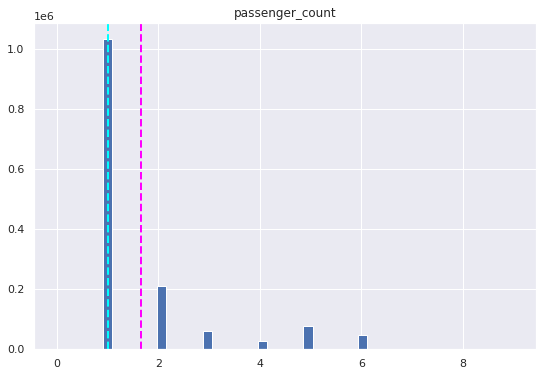

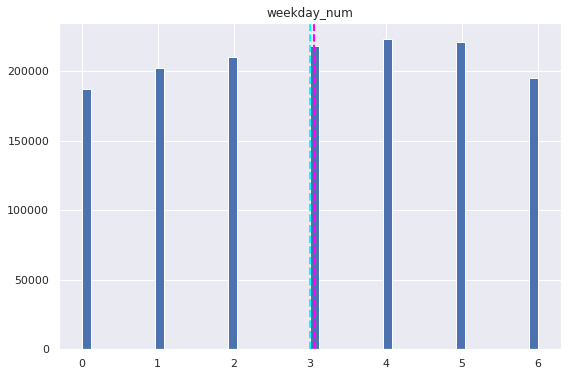

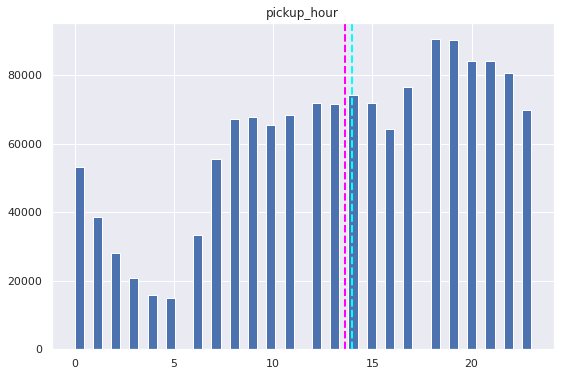

In [ ]:
# Chart - 2 visualization code
# Bar Plot of some important numerical feature
numeric_features = df[['passenger_count','weekday_num','pickup_hour']].describe().columns
numeric_features

# plot a bar plot for important numerical feature count 
# To see the distributions and skewness of the numerical feature
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

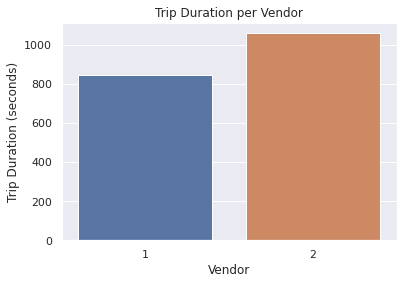

In [ ]:
# GRAPH - 1
# average trip durations by unique vendors
group1 = df.groupby('vendor_id').trip_duration.mean()
sns.barplot(group1.index, group1.values)
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Vendor')
plt.title('Trip Duration per Vendor')
plt.show()

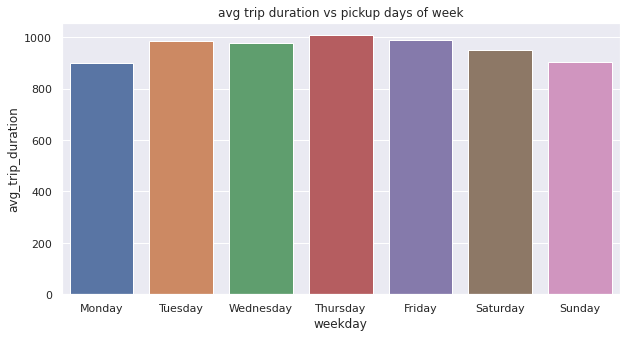

In [ ]:
# GRAPH - 2
# average trip duration over a week days
dummydf = df.copy()

import calendar
dummydf['weekday'] = dummydf.pickup_datetime.apply(lambda x : calendar.day_name[x.weekday()])

avg_duration_day = dummydf.groupby(['weekday'])['trip_duration'].mean().reset_index().rename(columns = {'trip_duration' : 'avg_trip_duration'})
plt.figure(figsize = (10, 5))
sns.barplot(x = 'weekday', y = 'avg_trip_duration', data = avg_duration_day, 
            order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']).set_title('avg trip duration vs pickup days of week')
plt.show()

In [ ]:
# GRAPH - 3
pd.options.display.float_format = '{:.2f}'.format #To suppress scientific notation.
df.passenger_count.value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

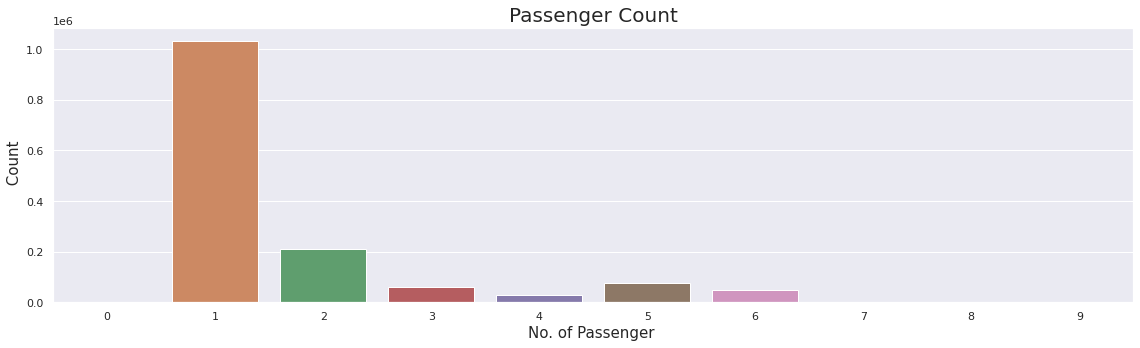

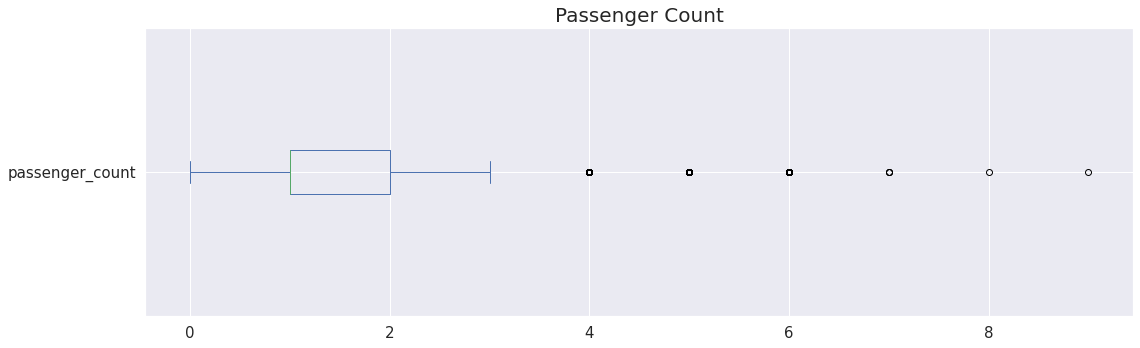

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(16,5))
# line = df['passenger_count'].value_counts().plot(kind='bar',fontsize = 15)
line = sns.countplot(df.passenger_count)
line.set_ylabel(" Count",fontsize = 15)
line.set_xlabel("No. of Passenger ",fontsize = 15)
line.set_title('Passenger Count',fontsize = 20)
fig.tight_layout()
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(16,5))
box = df['passenger_count'].plot(kind='box',vert = False,fontsize = 15)
box.set_title('Passenger Count',fontsize = 20)
fig.tight_layout()

**GRAPH - 1:** Vendor 2 takes the crown. Average trip duration for vendor 2 is higher than vendor 1 by a quite low margin.

**GRAPH - 2:** Tuesday, Wednesday, Thursday and Friday is the day where trip average trip duration is greater than any other weekdays.

**GRAPH - 3:** 
*  There are some trips with 0 passenger count.
*  Few trips consisted of even 6, 7, 8 or 9 passengers. Clear outliers and pointers to data inconsistency
*  Most of trip consist of passenger either 1 or 2.

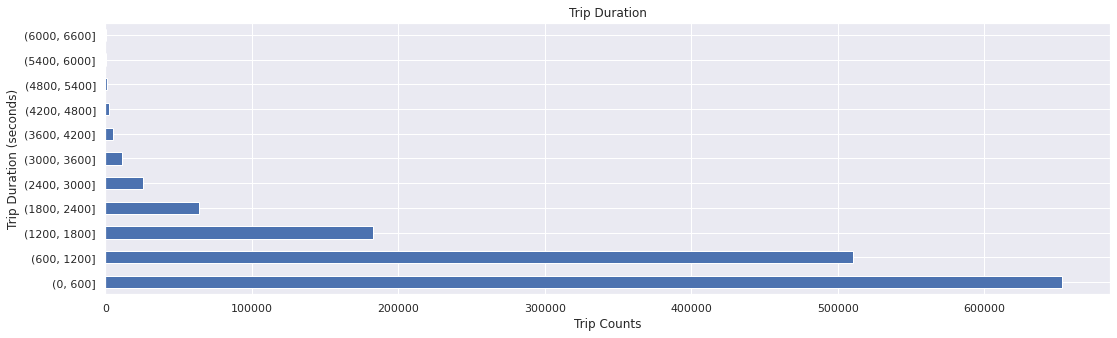

In [ ]:
df.trip_duration.groupby(pd.cut(df.trip_duration, np.arange(0,7200,600))).count().plot(kind='barh',figsize = (18,5))
plt.title('Trip Duration')
plt.xlabel('Trip Counts')
plt.ylabel('Trip Duration (seconds)')
plt.show()

Interesting find:
*  There some trips with over 60 miles distance.
*  Some of the trips distance value is 0 miles.
Observations:
*  mean distance travelled is approx 2.1 miles.

#### Chart -  Scatter Plot (Multivariate)

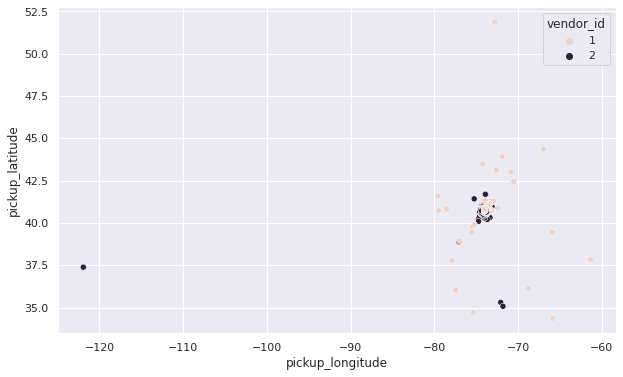

In [ ]:
# Chart - 3 visualization code
# vendor id using pickup latitude and pickup longitude
plt.figure(figsize=(10,6))
pickups = sns.scatterplot(df.pickup_longitude,df.pickup_latitude,hue=df.vendor_id)
plt.ioff()
plt.show()

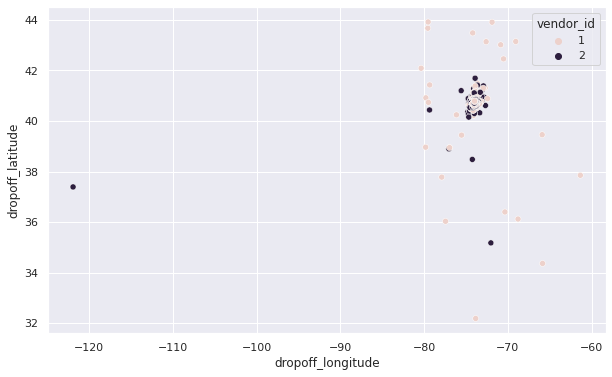

In [ ]:
# vendor id using dropoff latitude and dropoff longitude
plt.figure(figsize=(10,6))
dropoff = sns.scatterplot(df.dropoff_longitude,df.dropoff_latitude,hue=df.vendor_id)
plt.ioff()
plt.show()

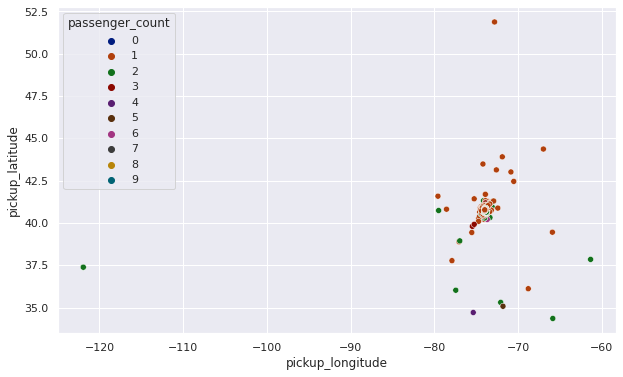

In [ ]:
# passenger count using pickup latitude and pickup longitude
plt.figure(figsize=(10,6))
sns.scatterplot(df.pickup_longitude,df.pickup_latitude,hue=df.passenger_count,palette='dark')
plt.ioff()
plt.show()

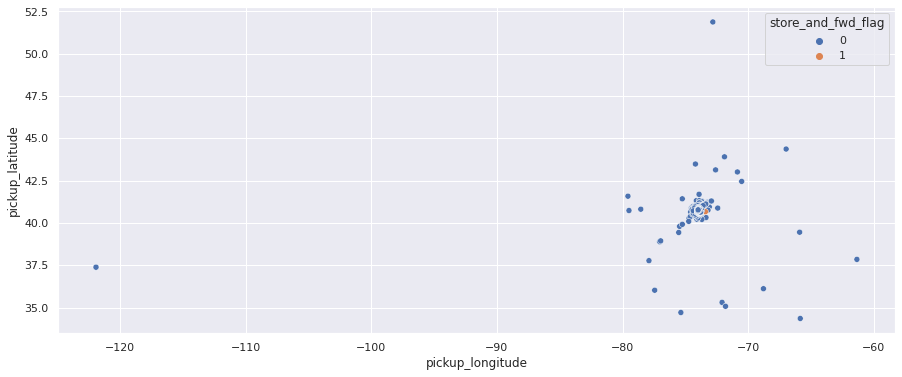

In [ ]:
# store and forward flag using pickup latitude and pickup longitude
plt.figure(figsize=(15,6))
sns.scatterplot(df.pickup_longitude,df.pickup_latitude,hue=df.store_and_fwd_flag)
plt.ioff()
plt.show()

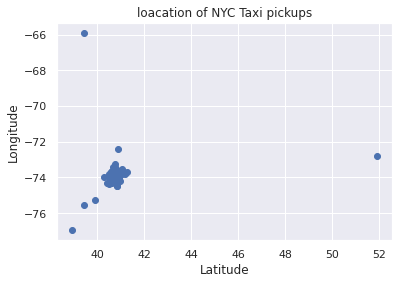

In [ ]:
# Select the columns of interest
dropoff_location = map_df[['pickup_latitude', 'pickup_longitude']]

# Plot the latitude and longitude values on a scatter plot
plt.scatter(dropoff_location['pickup_latitude'], dropoff_location['pickup_longitude'])

# Add customizations to the plot
plt.title("loacation of NYC Taxi pickups")
plt.xlabel("Latitude")
plt.ylabel("Longitude")

plt.show()


This all scatter plot representing us about the different vendor id, passenger count, store and forward flag using pickup latitude and pickup longitude as well as using dropoff latitude and dropoff longitude in a New York City.

#### Chart - Count Plot (Univariate Analysis)

In [ ]:
df['store_and_fwd_flag'].value_counts()

0    1450599
1       8045
Name: store_and_fwd_flag, dtype: int64

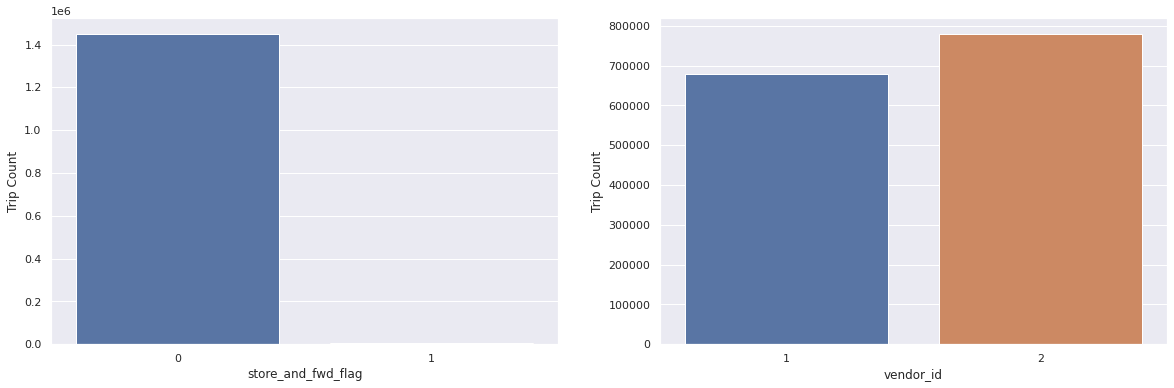

In [ ]:
# Chart - 4 visualization code
# GRAPH - 1
fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharey=False)
sns.countplot(x = df['store_and_fwd_flag'],ax = axes[0])
axes[0].set_ylabel('Trip Count')

sns.countplot(x = df['vendor_id'], ax = axes[1])
axes[1].set_ylabel('Trip Count')

plt.show()

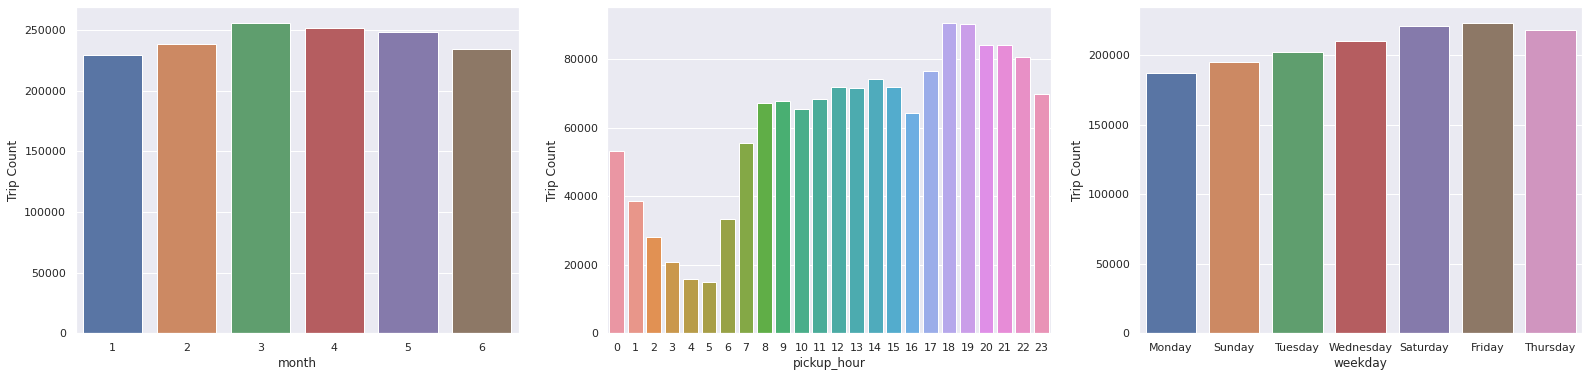

In [ ]:
# GRAPH - 2
fig, axes = plt.subplots(1, 3, figsize=(27, 6), sharey=False)
sns.countplot(x = dummydf['month'], ax=axes[0])
axes[0].set_ylabel('Trip Count')

sns.countplot(x = dummydf['pickup_hour'], ax=axes[1])
axes[1].set_ylabel('Trip Count')

sns.countplot(x = dummydf['weekday'], ax=axes[2])
axes[2].set_ylabel('Trip Count')

plt.show()

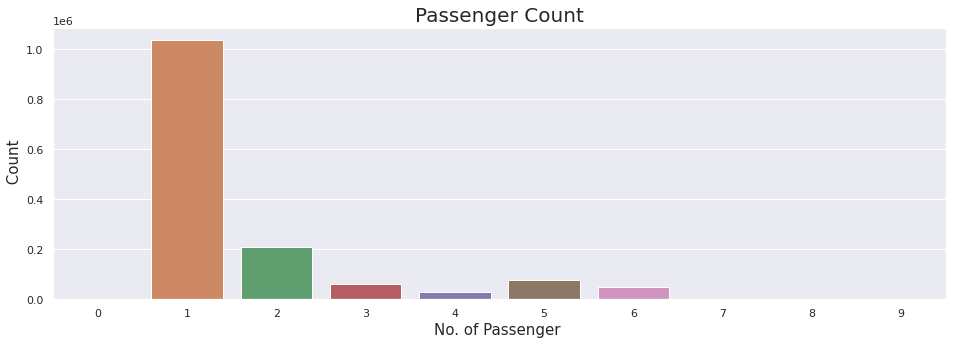

In [ ]:
# GRAPH - 3
plt.figure(figsize=(16,5))
line = sns.countplot(df.passenger_count)
line.set_ylabel(" Count",fontsize = 15)
line.set_xlabel("No. of Passenger ",fontsize = 15)
line.set_title('Passenger Count',fontsize = 20)
fig.tight_layout()

A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. The countplot is used to represent the occurrence(counts) of the observation present in the categorical variable.


**GRAPH - 1:**
* from the 'store_and_fwd_flag' graph, we can see and say that there are some records where the trip took place without internet access. 
* From the graph of 'vendor_id' it can be seen that this feature is well balanced, but has a larger amount of id 2.

**GRAPH - 2:**
* From the graph 2 of the months, it can be seen that all months have values close to the amount of data, with the lowest value in January and the highest in March.

* From the pickup hour chart, it can be seen that few trips take place between 0:00 am and 5:00 am and that many trips take place between 6:00 pm and 10:00 pm.

* From the weekday pickup graph, it can be observe that the weekdays do not have a relevant difference in the amount of data. Monday and Sunday are the days with the fewest trips and Saturday and Friday are the days with the most trips which is normal where some office going people likes to stay at home for rest on the weekends.

**GRAPH - 3:**
* Most of trip consist of passenger either 1 or 2.

#### Chart - Categorical plot (Bivariate Analysis)

In [ ]:
# Chart - 5 visualization code
# Passenger counts in a trip of different vendors in weekdays and weekends
dummydf['Day of Week(P)'] = dummydf['pickup_datetime'].apply(lambda x: "Weekday" if x.weekday() < 5 else "Weekend")
dummydf['Day of Week(D)'] = dummydf['dropoff_datetime'].apply(lambda x: "Weekday" if x.weekday() < 5 else "Weekend")

<Figure size 1440x720 with 0 Axes>

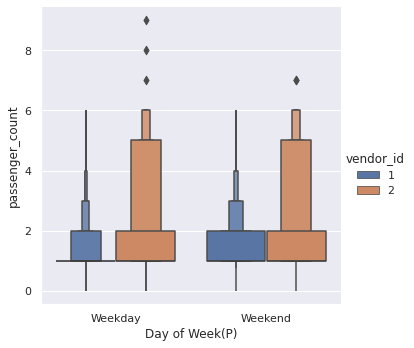

In [ ]:
# GRAPH - 1
plt.figure(figsize=(20,10))
sns.catplot(data=dummydf, x="Day of Week(P)", y="passenger_count", hue='vendor_id', kind="boxen")
plt.show()

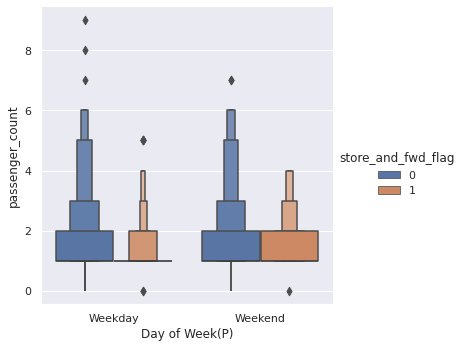

In [ ]:
# GRAPH - 2
# Passenger counts for store and fwd flag in weekdays and weekends
sns.catplot(data=dummydf, x="Day of Week(P)", y="passenger_count", hue='store_and_fwd_flag', kind="boxen")
plt.show()

**GRAPH - 1**
* From the graph 1, we can visualize that in the vendor id column, vendor id 2 has more number of passenger and also has a large number of outliers as compared to vendor id 1 with respect to weekday and weekends. so we have to deal with it.
* It can also be seen from graph 1 that vendor id 1 is less active in weekdays while in weekend it is more active.

**GRAPH - 2**
* From the graph 2, it can be observed that the 'store_and_fwd_flag' column have some records where the trip took place without internet access in weekdays and weekends.
* Above result of graph 2 shows that less percent of the trip details were stored in the vehicle first before sending it to the server. This might be because of outstation trips didn't had proper connection at the time when trip completes or Temporary loss of signals while the trip was about to finish or may be inconsistent signal reception over the trip duration. Also it can be possible that the GPS or mobile device battery was down when the trip finished.


#### Chart - Pie Chart (Univariate)

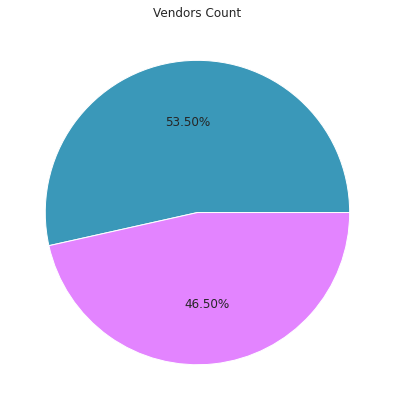

In [ ]:
# Chart - 6 visualization code
# GRAPH - 1
plt.figure(figsize=(8,7))
plt.pie(df['vendor_id'].value_counts(), autopct='%1.2f%%', colors=['#3A98B9', '#E384FF'])
plt.title('Vendors Count')
plt.show()

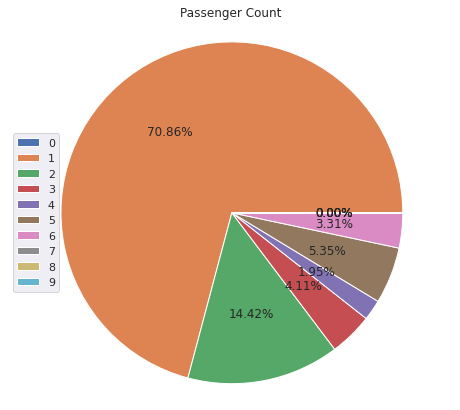

In [ ]:
# GRAPH - 2
passengers =  df.groupby(['passenger_count'])['passenger_count'].count()
labels = passengers.index
plt.figure(figsize=(8,7))
plt.title("Passenger Count")
plt.pie(passengers.values,autopct='%1.2f%%', radius=3)
plt.legend( labels, loc="center left")
plt.axis('equal')
plt.show()

**GRAPH - 1:**
*  Here we got to know that there are only 2 venders(1 and 2)
*  Both the venders share almost equal amount of trips, the difference is quite low between two venders
*  But Vendor 2 is evidently more famous among the population as per the above graphs.Answer Here

**GRAPH - 2:**
* It can be seen from the graph 2 that more than 90% of the data are from trips with up to 3 passengers, with almost 71% of trips made with one passenger.
* It is observed the presence of data with number of passengers equal to 0, but in a very small amount. As the amount of data is small and it is an inconsistent value.



#### Chart -Point Plots (Bivariate Analysis)


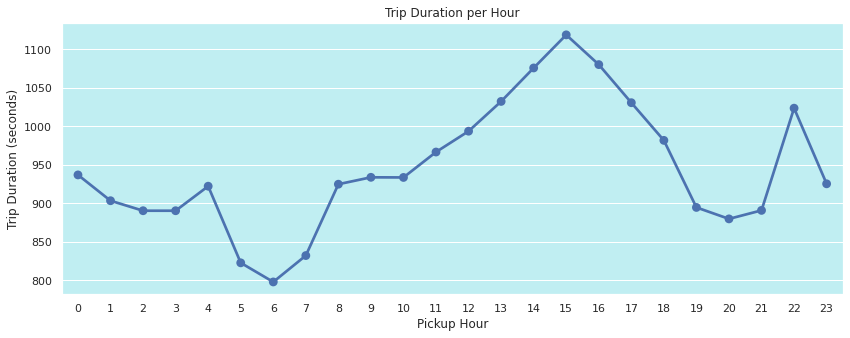

In [ ]:
# GRAPH-1
# is the trip duration higher at diffent hours ?
plt.figure(figsize = (14,5))
group1 = df.groupby('pickup_hour').trip_duration.mean()

ax = sns.pointplot(group1.index, group1.values)
ax.set_facecolor('#C0EEF2')
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Pickup Hour')
plt.title('Trip Duration per Hour')
plt.show()

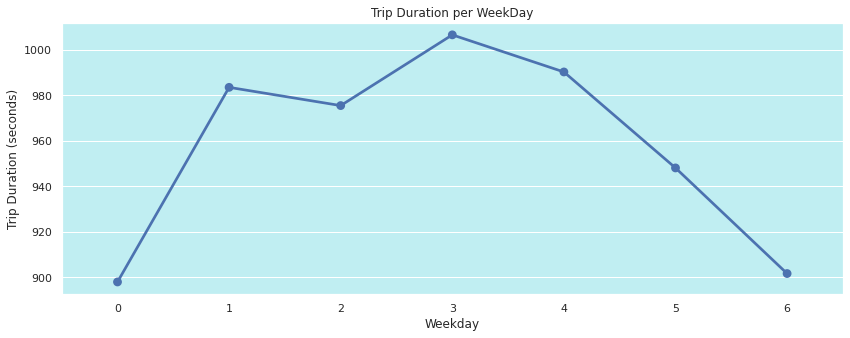

In [ ]:
# GRAPH-2
# is the trip duration varies at different weekdays ?
plt.figure(figsize = (14,5))
group2 = df.groupby('weekday_num').trip_duration.mean()
ax = sns.pointplot(group2.index, group2.values)
ax.set_facecolor('#C0EEF2')
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Weekday')
plt.title('Trip Duration per WeekDay')
plt.show()

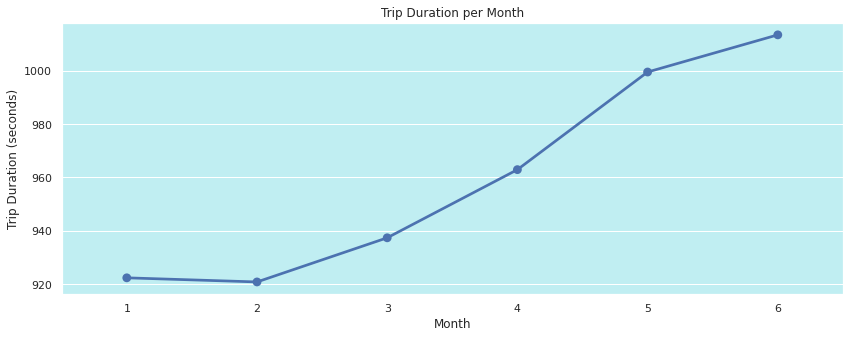

In [ ]:
# GRAPH-3
# is the trip duration varies at different Months ?
plt.figure(figsize = (14,5))
group2 = df.groupby('month').trip_duration.mean()
ax = sns.pointplot(group2.index, group2.values)
ax.set_facecolor('#C0EEF2')
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Month')
plt.title('Trip Duration per Month')
plt.show()

**GRAPH - 1:** Insights found from graph 1 :-
*  Average trip duration is lowest at 6 AM when there is minimal traffic on the roads.
*  Average trip duration is generally highest around 3 PM during the busy streets.1
*  Trip duration on an average is similar during early morning hours i.e. before 6 AM & late evening hours i.e. after 6 PM

**GRAPH - 2** Insights found from graph 2 :-

We can see that trip duration is almost equally distributed across the week on a scale of 0-1000 minutes with minimal difference in the duration times. Also, it is observed that trip duration on thursday is longest among all days.

**GRAPH - 3:**
* There is an increasing linear relationship between the months and the average value of the duration of trips.

#### Chart - Hist Plot (Histogram)

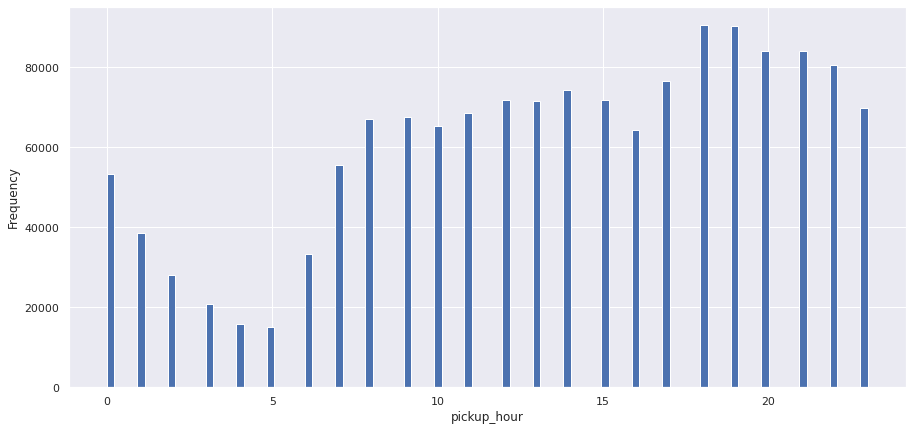

In [ ]:
# Chart - 10 visualization code
# GRAPH - 1
# What is the busiest pickup of the day ?
plt.figure(figsize=(15,7))
plt.hist(df['pickup_hour'], bins=100)
plt.xlabel('pickup_hour')
plt.ylabel('Frequency')
plt.show()

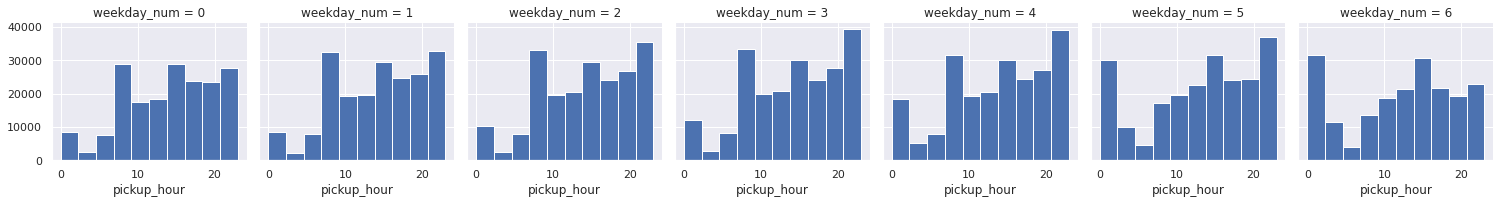

In [ ]:
# GRAPH - 2
n = sns.FacetGrid(dummydf.copy(), col='weekday_num')
n.map(plt.hist, 'pickup_hour')
plt.show()

**GRAPH - 1:**
The time of day definitely plays an important role. The frequency of cab rides seem to be the lowest at 5AM and the highest at 7PM & 8PM.

**GRAPH - 2:** 
* Taxi pickups increased in the late night hours over the weekend possibly due to more outstation rides or for the late night leisures nearby activities.
* Early morning pickups i.e before 5 AM have increased over the weekend in comparison to the office hours pickups i.e. after 7 AM which have decreased due to obvious reasons.
* Taxi pickups seems to be consistent across the week at 15 Hours i.e. at 3 PM.

#### Chart - Correlation Heatmap

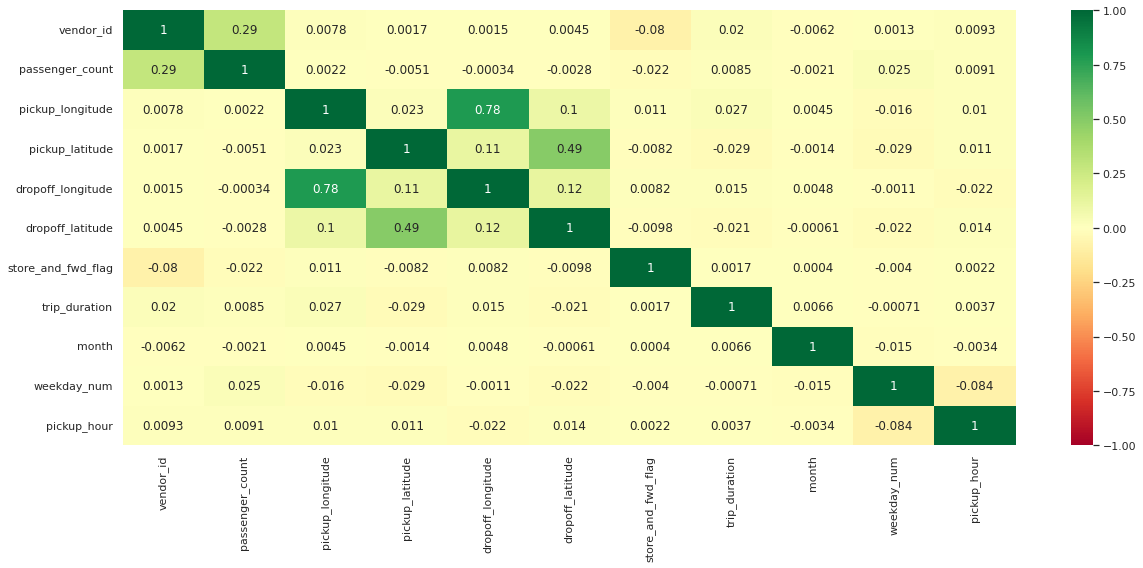

In [ ]:
# Chart - 10 visualization code
# Correlation Heatmap visualization code
corr = df.corr()
plt.figure(figsize = (20,8))
sns.heatmap(corr, annot=True, vmin = -1, vmax = 1, cmap='RdYlGn')
plt.show()

There is positive correlation between pickup longitude and dropoff longitude as well as pickup latitude and dropoff latitude which shows us that this features has a multicollinearity.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

**There is a significant difference in the trip duration between trips with a single passenger and trips with multiple passengers.**


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null hypothesis:** There is no significant difference in the trip duration between trips with a single passenger and trips with multiple passengers.

**Alternative hypothesis:** There is a significant difference in the trip duration between trips with a single passenger and trips with multiple passengers.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats

# Divide the dataset into two groups - one with trips with a single passenger and another with trips with multiple passengers
single_passenger_trips = df[df['passenger_count'] == 1]['trip_duration']
multi_passenger_trips = df[df['passenger_count'] > 1]['trip_duration']

# Perform a two-sample t-test
t_stat, p_val = stats.ttest_ind(single_passenger_trips, multi_passenger_trips, equal_var=False)

print('p-value:', p_val)


p-value: 9.892681782325478e-28


The **p-value of 9.89e-28** signifies that the probability of observing such extreme differences in trip duration between single passenger trips and multi-passenger trips by chance is very low. Therefore, **we can reject the null hypothesis** and conclude that **there is a significant difference in trip duration between these two groups.**

##### Which statistical test have you done to obtain P-Value?



a two-sample t-test

##### Why did you choose the specific statistical test?

We can randomly divide the dataset into two groups - one with trips with a single passenger and another with trips with multiple passengers. We can then compare the mean trip duration of these two groups using a two-sample t-test. If the p-value obtained is less than the significance level, we can reject the null hypothesis and conclude that there is a significant difference in the trip duration between trips with a single passenger and trips with multiple passengers.

### Hypothetical Statement - 2

**Trips with a higher distance have a longer duration**

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.


**Null Hypothesis:** The distance of the trip does not significantly affect the duration of the trip.

**Alternative Hypothesis:** The distance of the trip significantly affects the duration of the trip.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import statsmodels.api as sm

# Perform a simple linear regression analysis between trip duration and trip distance
X = sm.add_constant(dummydf['trip_distance'])
y = dummydf['trip_duration']
model = sm.OLS(y, X).fit()

# Print the regression coefficients and p-values
print(model.summary())
print("p-value for distance variable:", model.pvalues[1])

                            OLS Regression Results                            
Dep. Variable:          trip_duration   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                 1.080e+06
Date:                Mon, 27 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:15:18   Log-Likelihood:            -9.0723e+06
No. Observations:             1275337   AIC:                         1.814e+07
Df Residuals:                 1275335   BIC:                         1.814e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           262.9565      0.480    547.569

A **P_value of distance variable 0.0** indicates that the probability of obtaining the observed sample result assuming that null hypothesis is true is extremely small (essentially zero). 

Therefore , we **reject Null Hypothesis** and conclude that **there is a significant relationship between the two variables.**

##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain the p-value in the above code is Ordinary Least Squares (OLS) regression analysis. It is a commonly used linear regression method to estimate the unknown parameters in a linear regression model. The p-value of the slope coefficient in the OLS regression output provides the significance level of the relationship between the independent variable and the dependent variable.





##### Why did you choose the specific statistical test?

I chose the Ordinary Least Squares (OLS) regression analysis as the statistical test to test the hypothesis that the distance of the trip significantly affects the duration of the trip. OLS regression is a widely used method in linear regression analysis and can provide us with the slope coefficient of the regression line, which tells us whether there is a significant linear relationship between the independent variable (distance) and the dependent variable (duration). Additionally, the OLS regression output provides a p-value that can be used to test the significance of the slope coefficient.

### Hypothetical Statement - 3
**Trips during weekdays have a longer duration compared to weekends.**


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis:** The day of the week does not significantly affect the duration of the trip.

**Alternative Hypothesis:** The day of the week significantly affects the duration of the trip, with longer trip durations on weekdays compared to weekends.





#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import pandas as pd
from scipy.stats import ttest_ind


# create a new column for day of the week (0=Monday, 1=Tuesday, ..., 6=Sunday)
df['day_of_week'] = pd.to_datetime(df['pickup_datetime']).dt.dayofweek

# separate the dataset into two groups: weekdays and weekends
weekdays = df.loc[df['day_of_week'] < 5, 'trip_duration']
weekends = df.loc[df['day_of_week'] >= 5, 'trip_duration']

# perform two-sample t-test to determine whether the means of the two groups are significantly different
t_stat, p_val = ttest_ind(weekdays, weekends, equal_var=False)

print('t-statistic:', t_stat)
print('p-value:', p_val)


t-statistic: 3.900843948746583
p-value: 9.586970042130944e-05


The **t-statistic of 3.9008** indicates that the difference between the means of the two groups (weekday and weekend trip durations) **is 3.9008 times greater than the standard error of the difference between the means.**

The **p-value of 9.586970042130944e-05** (0.00009587) is less than the commonly used significance level of 0.05, which suggests **strong evidence against the null hypothesis.**

Therefore, **we reject Null hypothesis** and conclude that **there is a statistically significant difference between the means of weekday and weekend trip durations**

##### Which statistical test have you done to obtain P-Value?

 t-test for two independent samples

##### Why did you choose the specific statistical test?

We can separate the dataset into two groups: one group containing trip durations for weekdays and the other group containing trip durations for weekends. We can then calculate the mean and standard deviation of each group and perform a two-sample t-test to determine whether the difference in means is statistically significant.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

**There is no missing value to handle in our dataset**

#### What all missing value imputation techniques have you used and why did you use those techniques?

We do not have a missing values in our dataset

### 2. Handling Outliers

In [ ]:
def drop_outliers_iqr(data, column):
    Q1, Q3 = np.percentile(data[column], [25, 75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[column] > lower_bound) & (data[column] < upper_bound)]
    return data


##### What all outlier treatment techniques have you used and why did you use those techniques?

Ideally, IQR method is best suited for datasets which are skewed (either left or right). The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.

Quantile based flooring and capping - In this technique, the data points that are less than the 25th percentile are replaced with its 25th percentile value and the data points at are greater than the 75th percentile are replaced by 75th percentile value.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
dummydf = df.copy()

In [ ]:
# removing unneccessary data (trip_duration)
dummydf['new_trip_class'] = ['short' if duration < 60 else 'long' if duration > 2200 else 'normal' for duration in dummydf['trip_duration']]
x = dummydf['new_trip_class'].value_counts()
x

normal    1386014
long        64035
short        8595
Name: new_trip_class, dtype: int64

We are dropping:
* **Short Trips** : Trip duration is less than a minute
* **Long Trips**  : Trip duration is greater than 36 minute and 40 seconds

We keep **Normal trip** : Trip duration is between 1 - 36:40 min

by doing this we are **removing less than 5%** of our data. in that way data will be more cleaner and have less outliers

In [ ]:
dummydf = dummydf[(dummydf['new_trip_class'] == 'normal')]

In [ ]:
dummydf.shape

(1386014, 16)

In [ ]:
dummydf['new_trip_class'].value_counts()

normal    1386014
Name: new_trip_class, dtype: int64

In [ ]:
dummydf['passenger_count'].value_counts()

1    984006
2    198393
5     74151
3     56782
6     45956
4     26709
0        15
9         1
8         1
Name: passenger_count, dtype: int64

In [ ]:
# filter the DataFrame to exclude rows where column "passenger_count" contains 0, 9, or 8
dummydf = dummydf[~dummydf['passenger_count'].isin([0, 9, 8])]


In [ ]:
dummydf['passenger_count'].value_counts()

1    984006
2    198393
5     74151
3     56782
6     45956
4     26709
Name: passenger_count, dtype: int64

In [ ]:
dummydf.shape

(1385997, 16)

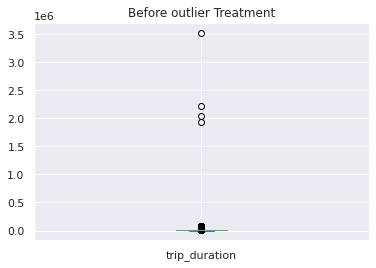

In [ ]:
df['trip_duration'].plot(kind='box')
plt.title('Before outlier Treatment')
plt.show()

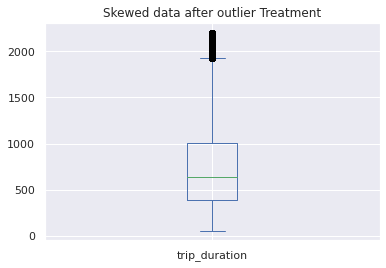

In [ ]:
dummydf['trip_duration'].plot(kind='box')
plt.title('Skewed data after outlier Treatment')
plt.show()

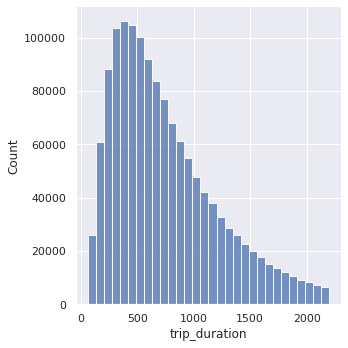

In [ ]:
sns.displot(dummydf, x="trip_duration", bins=30)
plt.show()

In [ ]:
dummydf.sort_values(by=['trip_distance'],ascending =False)[:5]


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,month,weekday_num,pickup_hour,date,new_trip_class,trip_distance
184925,id2306955,1,2016-05-07 18:58:53,2016-05-07 19:12:05,1,-72.81,51.88,-73.99,40.75,0,792,5,5,18,2016-05-07,normal,1240.91
974378,id1510552,2,2016-01-06 20:40:52,2016-01-06 20:51:03,5,-71.80,35.08,-79.35,40.44,0,611,1,2,20,2016-01-06,normal,891.21
910072,id1146400,1,2016-02-15 18:57:32,2016-02-15 19:02:35,2,-73.99,40.76,-70.35,36.40,0,303,2,0,18,2016-02-15,normal,578.84
923793,id1001696,1,2016-02-24 21:02:32,2016-02-24 21:25:57,1,-73.97,40.76,-79.55,43.67,0,1405,2,2,21,2016-02-24,normal,562.24
1013474,id3626673,1,2016-05-05 18:02:50,2016-05-05 18:18:23,1,-73.98,40.76,-79.34,41.43,0,933,5,3,18,2016-05-05,normal,455.24


In [ ]:
dummydf.shape

(1385997, 17)

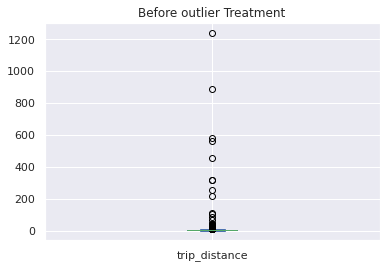

In [ ]:
dummydf['trip_distance'].plot(kind='box')
plt.title('Before outlier Treatment')
plt.show()

In [ ]:
dummydf = drop_outliers_iqr(dummydf,'trip_distance')
dummydf.shape

(1275337, 17)

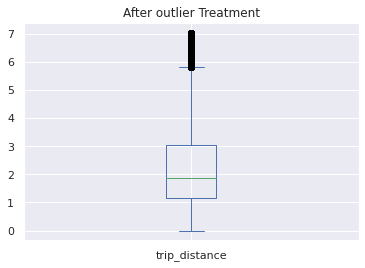

In [ ]:
dummydf['trip_distance'].plot(kind='box')
plt.title('After outlier Treatment')
plt.show()

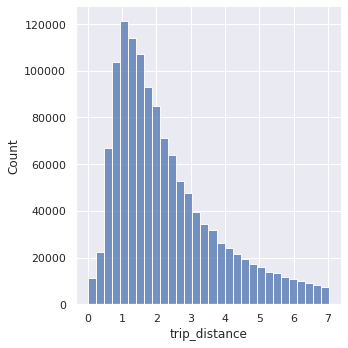

In [ ]:
sns.displot(dummydf, x="trip_distance", bins=30)
plt.show()

In [ ]:
dummydf[dummydf['trip_distance'] == 0.00].shape[0]

4482

In [ ]:
dummydf[dummydf['trip_distance'] > 4].shape[0]

180561

In [ ]:
#droppping column where distance is 0 and keeping colum where distance is greater than 0.00 km
dummydf = dummydf[dummydf['trip_distance'] > 0]

In [ ]:
dummydf.shape

(1270855, 17)

In [ ]:
def get_trips_counts(a,b):
  A = (dummydf['trip_distance']>= a) & (dummydf['trip_distance']< b)
  x = dummydf[A]
  row_count = x.shape[0]
  print(f'Number of trips between {a} and {b} km are :{row_count}')

In [ ]:
adist=list(np.arange(10))
bdist=list(np.arange(1,10))
for a,b in zip(adist,bdist):
  d = get_trips_counts(a,b)

Number of trips between 0 and 1 km are :229497
Number of trips between 1 and 2 km are :450705
Number of trips between 2 and 3 km are :265161
Number of trips between 3 and 4 km are :143913
Number of trips between 4 and 5 km are :86008
Number of trips between 5 and 6 km are :56033
Number of trips between 6 and 7 km are :38054
Number of trips between 7 and 8 km are :1484
Number of trips between 8 and 9 km are :0


In [ ]:
# # apply a log transformation to the 'trip_distance' column
# dummydf['trip_distance_log'] = np.log(dummydf['trip_distance'])
# sns.histplot(dummydf['trip_distance'], kde=True)
# sns.histplot(dummydf['trip_distance_log'], kde=True)
# plt.show()


In [ ]:
# # Apply a Box-Cox transformation to the data to make it more normal
# data_transformed_d, lam = boxcox(dummydf['trip_distance'])
# skewness_transformed = skew(data_transformed_d)
# print("Skewness after transformation:", skewness_transformed)
# print("Lambda value:", lam)


In [ ]:
# sns.displot(data_transformed_d, kde=True)
# plt.title("Distribution plot of skewness-transformed data")
# plt.xlabel("Transformed values")
# plt.show()

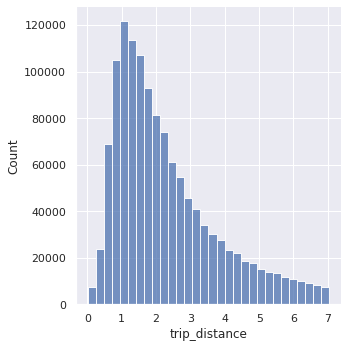

In [ ]:
sns.displot(dummydf, x="trip_distance", bins=30)
plt.show()

Even though the data is right skewed we are keeping it as it is.
because applying any transformation leads to adding negative values in our data,specially in trip distance column it adds -3 to 0 values in this case it is not possible.  although it reduces the skewness but it is of no use. It can be easily visualized in our above commented code and plots.  

#### 2.Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
dummydf.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,month,weekday_num,pickup_hour,date,new_trip_class,trip_distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,3,0,17,2016-03-14,normal,1.50
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,6,6,0,2016-06-12,normal,1.81
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,1,1,11,2016-01-19,normal,6.39
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,4,2,19,2016-04-06,normal,1.49
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,3,5,13,2016-03-26,normal,1.19


In [ ]:
dummydf[dummydf['trip_distance'] == 2].head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,month,weekday_num,pickup_hour,date,new_trip_class,trip_distance
1503,id0375039,1,2016-06-08 23:32:19,2016-06-08 23:40:26,2,-73.991096,40.745010,-73.969261,40.752010,0,487,6,2,23,2016-06-08,normal,2.0
1510,id3855990,1,2016-02-05 14:08:10,2016-02-05 14:17:24,1,-73.952332,40.777798,-73.963501,40.761909,0,554,2,4,14,2016-02-05,normal,2.0
1625,id0041995,1,2016-04-20 14:15:33,2016-04-20 14:30:56,1,-73.939140,40.805099,-73.962921,40.805122,0,923,4,2,14,2016-04-20,normal,2.0
1653,id3193566,2,2016-03-30 20:04:37,2016-03-30 20:18:07,1,-74.008049,40.738579,-73.997231,40.722530,0,810,3,2,20,2016-03-30,normal,2.0
2647,id3882536,2,2016-04-13 17:22:24,2016-04-13 17:37:14,1,-73.962799,40.766430,-73.983932,40.774670,0,890,4,2,17,2016-04-13,normal,2.0


In [ ]:
dummydf.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'month', 'weekday_num', 'pickup_hour', 'date',
       'new_trip_class', 'trip_distance'],
      dtype='object')

In [ ]:
X  = dummydf[['passenger_count', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude',
      'month', 'weekday_num', 'pickup_hour','trip_distance']]
y = dummydf['trip_duration']      

In [ ]:
from sklearn.feature_selection import mutual_info_regression

# Compute the mutual information between each feature and the target variable
mutual_info = mutual_info_regression(X, y)
mutual_info

array([0.        , 0.00992449, 0.01108097, 0.01079223, 0.02133206,
       0.00089099, 0.00325006, 0.01416189, 0.39734836])

In [ ]:
# Sort the features by mutual information score
features_by_mi = X.columns[mutual_info.argsort()[::-1]]

# Select the top k features based on mutual information
k = 10
selected_features_mi = features_by_mi[:k]
selected_features_mi

Index(['trip_distance', 'dropoff_latitude', 'pickup_hour', 'pickup_latitude',
       'dropoff_longitude', 'pickup_longitude', 'weekday_num', 'month',
       'passenger_count'],
      dtype='object')

Finally we found out 9 indepenedent features which are important. All the features which i left with having some importances and none of them are 0. So, It validates the features make sense and heading towards the right direction.

**Important Features:**
'trip_distance', 'dropoff_latitude', 'pickup_hour', 'pickup_latitude''dropoff_longitude', 'pickup_longitude', 'weekday_num', 'month','vendor_id', 'passenger_count'

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.head(5)

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,month,weekday_num,pickup_hour,trip_distance
1254500,3,-73.987801,40.733440,-73.981163,40.689205,5,5,0,4.95
462381,1,-73.978371,40.786381,-73.986214,40.761513,3,2,16,2.84
636661,1,-73.959854,40.773563,-73.947525,40.771172,5,3,9,1.07
179561,2,-73.989845,40.757221,-73.994461,40.719379,6,0,23,4.23
1412225,2,-73.986870,40.761108,-73.956284,40.764629,2,2,7,2.61


##### What data splitting ratio have you used and why? 

Our data has 1458644 row and after manipulation, 10 rows so it'll not be surprised to find out that 80/20 is quite a commonly occurring ratio, often referred to as the Pareto principle. It's usually a safe bet if you use that ratio.

In this case we have sufficient data, that's why we have taken 80:20 ratio.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

In [ ]:
# Handling Imbalanced Dataset (If needed)
df['store_and_fwd_flag'].value_counts()

0    1450599
1       8045
Name: store_and_fwd_flag, dtype: int64

In [ ]:
df.shape

(1458644, 16)

In [ ]:
8045/14586.44

0.5515396491535974

In [ ]:
100-0.5515396491535974

99.4484603508464

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Yes in our data store and forwaded flag Feature is highly imbalanced

* The value count of 1 in store and forwaded flag Feature is 0.55 % almost nill
* The value count of 0 in store and forwaded flag Feature is 99.45% all data

Hence we drop this feature

## ***7. ML Model Implementation***

In [ ]:
X_train.shape

(1016684, 9)

In [ ]:
X_test.shape

(254171, 9)

### ML Model - 1 Linear Regression

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

reg = LinearRegression()
reg.fit(X_train, y_train)

# Predict on the model
y_pred = reg.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import explained_variance_score
# Evaluate the model using four metrics: RMSE, MAE, R2, and EVS
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
n = len(y)
p = 9
adj_r_squared = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
evs = explained_variance_score(y_test, y_pred)
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R2: {r2:.2f}')
print(f'Adjusted R2 of samplesize: {n} : {adj_r_squared:.2f}')
print(f'EVS: {evs:.2f}')


RMSE: 291.67
MAE: 217.92
R2: 0.48
Adjusted R2 of samplesize: 1270855 : 0.48
EVS: 0.48


##### Which hyperparameter optimization technique have you used and why?

copy_X: Whether to make a copy of the feature matrix (X) or perform calculations in place. The default value is True, meaning a copy is made, but in this case, the best hyperparameter value found is True.
fit_intercept: Whether to include an intercept term in the linear regression model. The default value is True, but in this case, the best hyperparameter value found is False, which means that the model will not include an intercept term.
normalize: Whether to normalize the feature matrix (X) before fitting the model. The default value is False, but in this case, the best hyperparameter value found is True, which means that the feature matrix will be normalized before fitting the model.

Therefore, the best hyperparameters for the linear regression model in this case indicate that the feature matrix should be normalized before fitting the model, and that the model should not include an intercept term. Additionally, the hyperparameter copy_X is set to its default value of True, meaning a copy of the feature matrix will be made.



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2 Ridge Regression

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# Create Ridge regression model and fit to training data
alpha = 1.0  # Regularization strength

model = Ridge(alpha=alpha)
model.fit(X_train, y_train)

# Predict trip duration using test data
y_pred = model.predict(X_test)

# Evaluate model performance using root mean squared error (RMSE) and R-squared score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
n = len(y)
p = 11
adj_r_squared = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
evs = explained_variance_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'Adjusted R2 of samplesize: {n} : {adj_r_squared:.2f}')
print(f'R2: {r2:.2f}')
print(f'EVS: {evs:.2f}')


RMSE: 291.67
MAE: 217.92
Adjusted R2 of samplesize: 1270855 : 0.48
R2: 0.48
EVS: 0.48


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV
# Define hyperparameter grid for cross-validation
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}


# Create Ridge regression model
model = Ridge()

# Define hyperparameter grid for cross-validation
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}

# Fit the Algorithm
# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print best hyperparameter and corresponding mean cross-validation score
print('Best alpha:', grid_search.best_params_['alpha'])
print('Best CV score:', grid_search.best_score_)

# Predict on the model
# Predict trip duration using test data and best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate model performance using various metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

from sklearn.model_selection import cross_val_predict
# Evaluate model performance using cross-validation
y_cv_pred = cross_val_predict(best_model, X, y, cv=5)
cv_rmse = np.sqrt(mean_squared_error(y, y_cv_pred))
cv_mae = mean_absolute_error(y, y_cv_pred)
cv_r2 = r2_score(y, y_cv_pred)
cv_evs = explained_variance_score(y, y_cv_pred)
print()
print('--- Test Metrics ---')
print('RMSE:', rmse)
print('MAE:', mae)
print('R-squared:', r2)
print('Explained Variance Score:', evs)

print('--- Cross-Validation Metrics ---')
print('RMSE:', cv_rmse)
print('MAE:', cv_mae)
print('R-squared:', cv_r2)
print('Explained Variance Score:', cv_evs)


Best alpha: 0.01
Best CV score: 0.47643007129228643
--- Test Metrics ---
RMSE: 291.67107570384314
MAE: 217.91744001861707
R-squared: 0.4778867846411474
Explained Variance Score: 0.47788684632042056
--- Cross-Validation Metrics ---
RMSE: 292.1720018110165
MAE: 218.06393080831035
R-squared: 0.4766074678300577
Explained Variance Score: 0.4766074679518085


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model.  But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. 
Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model. 

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

we used GridSearchCV as the hyperparameter optimization technique.

GridSearchCV is a simple and widely used technique for hyperparameter tuning. It exhaustively searches over a specified parameter grid to find the best combination of hyperparameters. GridSearchCV uses cross-validation to evaluate the performance of each combination of hyperparameters, and returns the best hyperparameters based on the scoring metric specified.

we chose GridSearchCV in this case because it is a widely used and simple hyperparameter optimization technique that works well for small and medium-sized datasets like the one used in this example. Additionally, by using cross-validation with GridSearchCV, we can ensure that our model is evaluated on multiple subsets of the training data, which helps to reduce the risk of overfitting.





#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Root Mean Squared Error (RMSE): RMSE measures the average deviation of the predicted values from the true values. It is calculated as the square root of the average of the squared differences between the predicted and true values. RMSE indicates how well the model predicts the actual values and is a good metric to use when there are no significant outliers in the data. Lower values of RMSE indicate better model performance.

Business impact: RMSE can be used to measure the accuracy of the model's predictions. For example, if the model is being used to predict the duration of a taxi trip, a low RMSE indicates that the model is accurately predicting trip durations, which can help taxi companies optimize their operations, plan better routes, and allocate resources more efficiently.

Mean Absolute Error (MAE): MAE measures the average absolute deviation of the predicted values from the true values. It is calculated as the average of the absolute differences between the predicted and true values. MAE is a good metric to use when there are significant outliers in the data. Lower values of MAE indicate better model performance.

Business impact: Similar to RMSE, MAE can be used to measure the accuracy of the model's predictions. A low MAE indicates that the model is accurately predicting trip durations, which can help taxi companies optimize their operations, plan better routes, and allocate resources more efficiently.

R-squared (R2): R2 measures the proportion of the variance in the dependent variable (trip duration) that is explained by the independent variables (distance, passenger count, pickup and dropoff locations). R2 ranges from 0 to 1, with higher values indicating a better fit between the model and the data.

Business impact: R2 can be used to evaluate how well the model fits the data. A high R2 indicates that the model is a good fit for the data and can provide useful insights into the factors that influence trip durations. This can help taxi companies identify patterns in their data and optimize their operations accordingly.

Explained Variance Score (EVS): EVS measures the proportion of the variance in the dependent variable (trip duration) that is explained by the model. EVS ranges from 0 to 1, with higher values indicating a better fit between the model and the data.

Business impact: EVS provides similar information to R2, but is scaled between 0 and 1, which can make it easier to interpret. A high EVS indicates that the model is a good fit for the data and can provide useful insights into the factors that influence trip durations. This can help taxi companies identify patterns in their data and optimize their operations accordingly.

Max Error: Max Error measures the maximum difference between the predicted and true values. It provides information on the worst-case scenario for the model's predictions.

Business impact: Max Error can help identify cases where the model is making significantly incorrect predictions. For example, if the model is predicting that a trip will take much longer than it actually does, this can have a negative impact on customer satisfaction and can lead to lost revenue. By identifying these cases, taxi companies can take steps to improve the model's performance and prevent such scenarios from occurring.


### ML Model - 3 Lasso Regression

In [ ]:
# ML Model - 3 Implementation

# Define the Lasso regression model
reg = Lasso()

# Fit the Algorithm
reg.fit(X_train, y_train)

# Predict on the model
y_pred = reg.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R2: {r2:.2f}')
print(f'EVS: {evs:.2f}')

RMSE: 293.45
MAE: 219.75
R2: 0.47
EVS: 0.47


### ML Model - 4 Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
y_pred = rf.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('R2 score:', r2)
n = len(y)
p = 9
adj_r_squared = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
print('Adjusted r2: ',adj_r_squared)

R2 score: 0.7208182963366805
Adjusted r2:  0.7208163191991594


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print(f'rmse: {rmse} and mae: {mae}')

rmse: 213.2821435931476 and mae: 151.7844378784362


In [ ]:
features =['passenger_count', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude',
      'month', 'weekday_num', 'pickup_hour','trip_distance']

In [ ]:
importances = rf.feature_importances_
indices = pd.Series(importances, index=features).sort_values(ascending=False)
print('Important features:')
print(indices)

Important features:
trip_distance        0.525085
dropoff_latitude     0.092432
pickup_hour          0.087863
dropoff_longitude    0.077770
pickup_longitude     0.077081
pickup_latitude      0.066355
weekday_num          0.042309
month                0.020677
passenger_count      0.010429
dtype: float64


In [ ]:
from sklearn.model_selection import  cross_val_score

scores = cross_val_score(rf, X, y, cv=2, scoring='r2')
print('Cross-validation scores:', scores)
print('Average R2 score:', scores.mean())

rf.fit(X, y)


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

* Root mean square Error
* Mean Absolute Error 
* R2 and Adjusted R2 score

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

From Above four Model we have choosen **Random Forest Regressor**
Because
1. It reduces RMSE from 291.67 to 213.228
2. Reduces MAE from 217.92 to 151.78
3. Improves R2 from  0.48 to R2 score: 0.7208182963366805
4. Improve Adjusted r2 from 0.48 to 0.7208163191991594


### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
importances = rf.feature_importances_
indices = pd.Series(importances, index=features).sort_values(ascending=False)
print('Important features:')
print(indices)

Important features:
trip_distance        0.525085
dropoff_latitude     0.092432
pickup_hour          0.087863
dropoff_longitude    0.077770
pickup_longitude     0.077081
pickup_latitude      0.066355
weekday_num          0.042309
month                0.020677
passenger_count      0.010429
dtype: float64


The importance of each feature is then normalized such that the sum of all feature importances is equal to 1.0. Therefore, a higher feature importance value indicates that the feature is more important for the model's prediction.

In our case Most important feature is **trip distance almost 52 %**

feature_importances_ can be used as an explainability tool to gain insights into which features are driving the predictions made by the model. By analyzing the feature importance scores, we can identify the most important features and understand their relative contribution to the model's overall performance. This information can be used to guide feature selection and engineering efforts to improve the model's accuracy and generalization.

# **Conclusion**

In conclusion, predicting taxi trip time accurately is an important task for optimizing transportation services in NYC. There have been many efforts to improve the accuracy of trip time predictions, including the use of advanced machine learning techniques, incorporating additional data sources, developing real-time prediction models, improving location accuracy, and incorporating user feedback.

Improving the accuracy of taxi trip time predictions has the potential to provide significant benefits:

1. **For transportation services in NYC**
2. **Including reducing wait times for passengers**
3. **Optimizing driver routes** and 
4. **Improving overall transportation efficiency** 

 As such, it is an important area of research and development that will likely continue to receive attention and investment in the years to come.